# Food Classification

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

2023-12-27 07:51:02.664232: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [5]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
# unzip the folder
#!unzip /home/jovyan/examples/examples/tensorflow/archive.zip

## 1. EDA

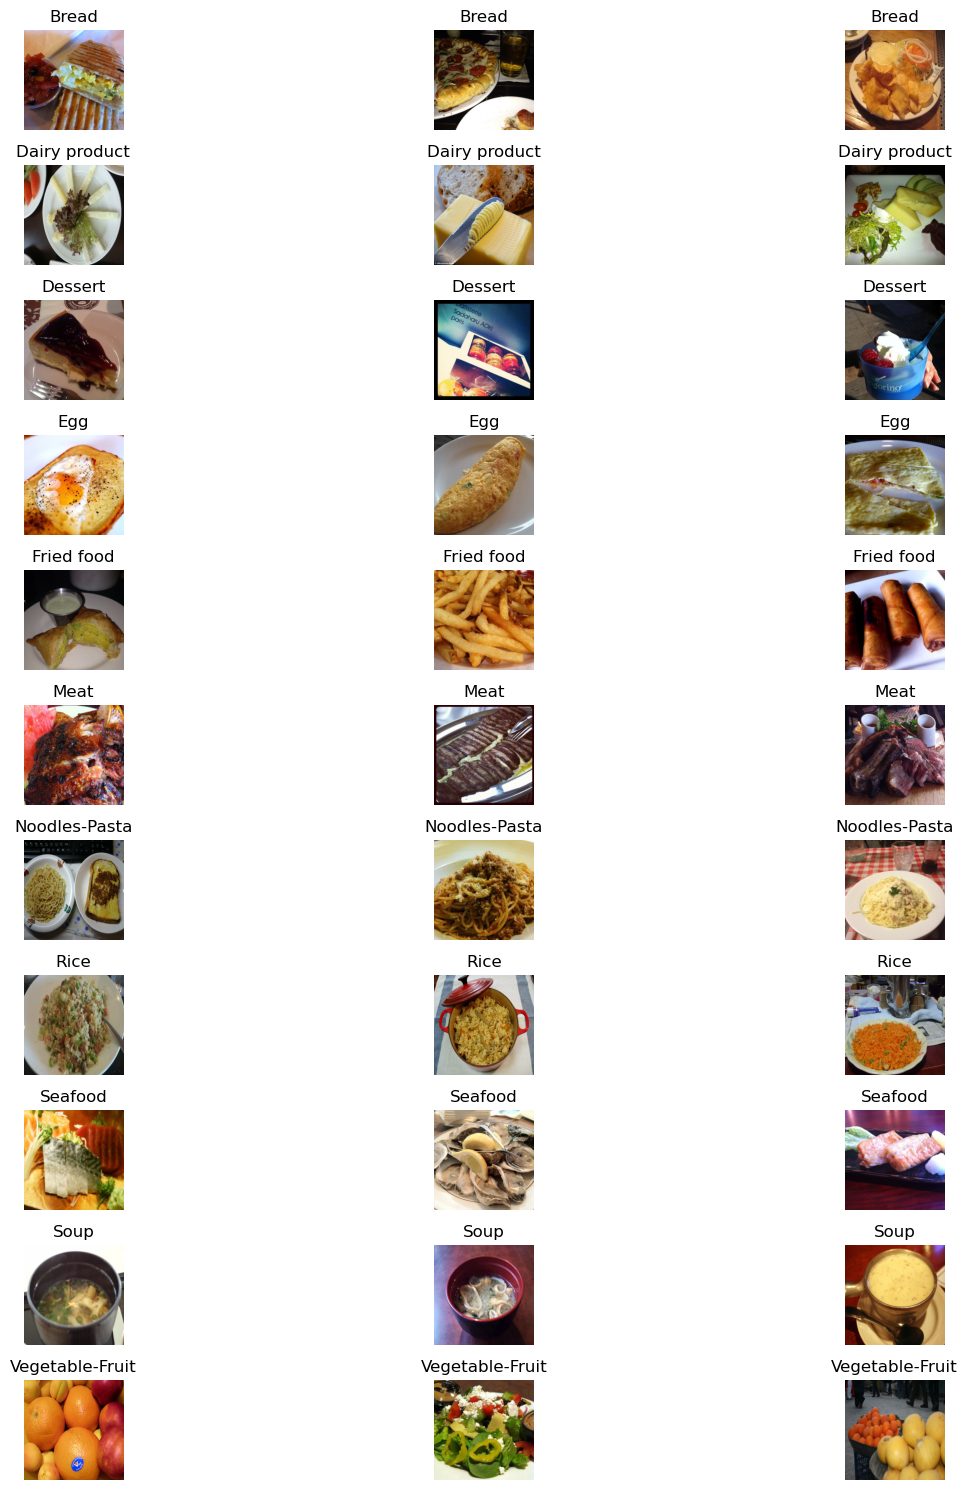

In [10]:
training_path = "./training"

subdirectories = [
    "Bread", "Dairy product", "Dessert", "Egg",
    "Fried food", "Meat", "Noodles-Pasta",
    "Rice", "Seafood", "Soup", "Vegetable-Fruit"
]

target_size = (299, 299)
num_images_per_category = 3

num_rows = len(subdirectories)
num_cols = num_images_per_category

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, category in enumerate(subdirectories):
    category_path = os.path.join(training_path, category)
    image_files = os.listdir(category_path)[:num_images_per_category]

    for j, image_file in enumerate(image_files):
        image_path = os.path.join(category_path, image_file)
        
        img = Image.open(image_path)
        img = img.resize(target_size)

        axs[i, j].imshow(img)
        axs[i, j].set_title(category)
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()

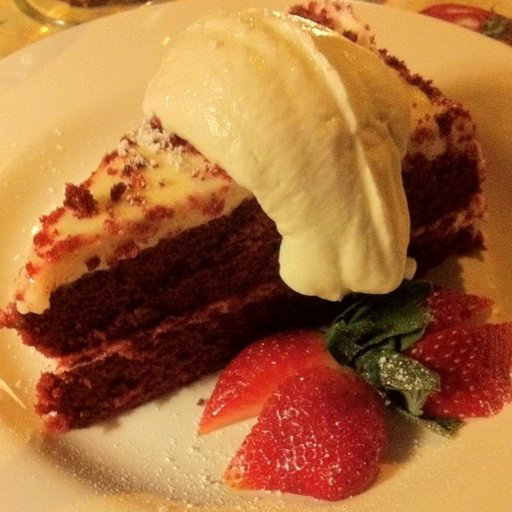

In [6]:
path = "./training/Dessert"
name = "100.jpg"
fullname = f"{path}/{name}"
load_img(fullname)

In [7]:
img = load_img(fullname, target_size=(299, 299))

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

In [9]:
x

array([[[240, 168,  57],
        [232, 162,  51],
        [237, 169,  62],
        ...,
        [218, 148,  52],
        [221, 152,  51],
        [220, 151,  47]],

       [[237, 167,  55],
        [242, 172,  61],
        [233, 165,  58],
        ...,
        [217, 147,  52],
        [218, 148,  52],
        [217, 147,  49]],

       [[227, 159,  48],
        [237, 169,  60],
        [235, 168,  63],
        ...,
        [213, 142,  52],
        [213, 142,  50],
        [216, 146,  51]],

       ...,

       [[233, 188, 131],
        [229, 184, 127],
        [233, 188, 131],
        ...,
        [227, 174,  94],
        [228, 175,  97],
        [224, 171,  93]],

       [[236, 191, 134],
        [236, 191, 134],
        [234, 189, 132],
        ...,
        [223, 170,  90],
        [226, 173,  95],
        [226, 173,  95]],

       [[231, 186, 129],
        [227, 182, 125],
        [230, 185, 128],
        ...,
        [225, 172,  92],
        [225, 172,  94],
        [223, 170,  94]]

## 2. Pre-trained convolutional neural networks

In [11]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [12]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2023-12-27 07:56:29.320979: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-27 07:56:29.327628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-27 07:56:29.328208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-27 07:56:29.329523: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [13]:
X = np.array([x])

In [14]:
X.shape

(1, 299, 299, 3)

In [15]:
X = preprocess_input(X)

In [16]:
pred = model.predict(X)

2023-12-27 07:56:41.385730: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-27 07:56:42.010676: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-27 07:56:42.011159: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-27 07:56:42.011189: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-27 07:56:42.011741: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-27 07:56:42.011820: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [17]:
pred.shape

(1, 1000)

In [18]:
decode_predictions(pred)

[[('n07614500', 'ice_cream', 0.42941907),
  ('n07579787', 'plate', 0.39077544),
  ('n07836838', 'chocolate_sauce', 0.07547479),
  ('n07613480', 'trifle', 0.012123299),
  ('n07697313', 'cheeseburger', 0.009649314)]]

## 3. Transfer learning

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Checking the train data

In [20]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './training',
    target_size=(150, 150),
    batch_size=32
)

Found 9866 images belonging to 11 classes.


In [21]:
train_ds.class_indices

{'Bread': 0,
 'Dairy product': 1,
 'Dessert': 2,
 'Egg': 3,
 'Fried food': 4,
 'Meat': 5,
 'Noodles-Pasta': 6,
 'Rice': 7,
 'Seafood': 8,
 'Soup': 9,
 'Vegetable-Fruit': 10}

In [22]:
X, y = next(train_ds)

In [23]:
X.shape

(32, 150, 150, 3)

In [24]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Checking the validation data

In [25]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3430 images belonging to 11 classes.


### Base model

In [26]:
# include_top=False  => Don't Include the Dense Layers

base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

# freeze conv. layers
base_model.trainable = False

In [27]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(11)(vectors)

model = keras.Model(inputs, outputs)

In [28]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [29]:
preds.shape

(32, 11)

In [30]:
preds[0]

array([-0.53091717,  0.14331882, -0.27648485,  0.5927527 , -1.1628604 ,
        0.48083943,  0.2090251 , -0.08097655, -0.5862517 , -0.56212175,
        0.5491481 ], dtype=float32)

- The outputs are nonsense without training, so we need to train the model.

In [31]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [32]:
# Train the model, validate it with validation data, and save the training history
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
309/309 [==============================] - 77s 242ms/step - loss: 1.4573 - accuracy: 0.6730 - val_loss: 1.4260 - val_accuracy: 0.6950
Epoch 2/15
309/309 [==============================] - 65s 209ms/step - loss: 1.0852 - accuracy: 0.7573 - val_loss: 1.5313 - val_accuracy: 0.7429
Epoch 3/15
309/309 [==============================] - 65s 211ms/step - loss: 0.8000 - accuracy: 0.8064 - val_loss: 1.4943 - val_accuracy: 0.7257
Epoch 4/15
309/309 [==============================] - 65s 210ms/step - loss: 0.7073 - accuracy: 0.8245 - val_loss: 1.8211 - val_accuracy: 0.7108
Epoch 5/15
309/309 [==============================] - 65s 211ms/step - loss: 0.6459 - accuracy: 0.8408 - val_loss: 1.6036 - val_accuracy: 0.7297
Epoch 6/15
309/309 [==============================] - 65s 211ms/step - loss: 0.5681 - accuracy: 0.8574 - val_loss: 1.9111 - val_accuracy: 0.7257
Epoch 7/15
309/309 [==============================] - 65s 211ms/step - loss: 0.5073 - accuracy: 0.8727 - val_loss: 2.7467 - val_ac

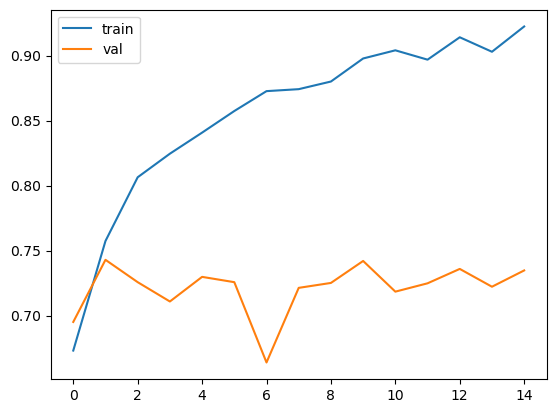

In [34]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()

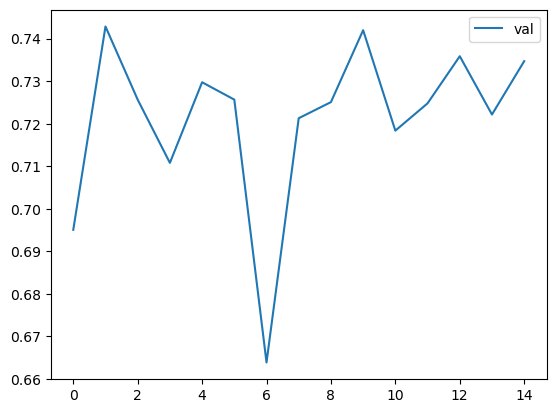

In [35]:
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()

**Classes, function, and attributes**:
- `from tensorflow.keras.preprocessing.image import ImageDataGenerator`: to read the image data and make it useful for training/validation
- `flow_from_directory()`: method to read the images directly from the directory
- `next(train_ds)`: to unpack features and target variables
- `train_ds.class_indices`: attribute to get classes according to the directory structure
- `GlobalAveragePooling2D()`: accepts 4D tensor as input and operates the mean on the height and width dimensionalities for all the channels and returns vector representation of all images
- `CategoricalCrossentropy()`: method to produces a one-hot array containing the probable match for each category in multi classification
- `model.fit()`: method to train model
- `epochs`: number of iterations over all of the training data
- `history.history`: history attribute is a dictionary recording loss and metrics values (accuracy in our case) for at each epoch


## 4. Adjusting the learning rate

In [36]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(11)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [37]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(f"learning rate: {lr}")

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

learning rate: 0.0001
Epoch 1/10
309/309 [==============================] - 68s 213ms/step - loss: 1.6421 - accuracy: 0.4758 - val_loss: 1.2024 - val_accuracy: 0.6239
Epoch 2/10
309/309 [==============================] - 65s 210ms/step - loss: 1.0296 - accuracy: 0.6785 - val_loss: 0.9821 - val_accuracy: 0.6819
Epoch 3/10
309/309 [==============================] - 65s 210ms/step - loss: 0.8805 - accuracy: 0.7158 - val_loss: 0.8967 - val_accuracy: 0.7085
Epoch 4/10
309/309 [==============================] - 65s 209ms/step - loss: 0.8055 - accuracy: 0.7387 - val_loss: 0.8485 - val_accuracy: 0.7163
Epoch 5/10
309/309 [==============================] - 65s 209ms/step - loss: 0.7554 - accuracy: 0.7551 - val_loss: 0.8171 - val_accuracy: 0.7268
Epoch 6/10
309/309 [==============================] - 65s 210ms/step - loss: 0.7197 - accuracy: 0.7641 - val_loss: 0.7953 - val_accuracy: 0.7391
Epoch 7/10
309/309 [==============================] - 65s 210ms/step - loss: 0.6901 - accuracy: 0.7745 - val

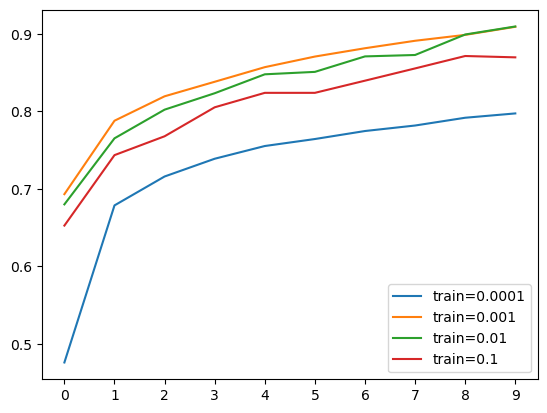

In [38]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

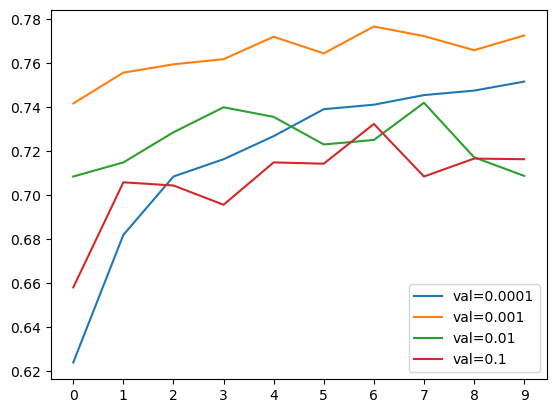

In [39]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [40]:
# best learning_rate = 0.001
learning_rate = 0.001

## 5. Checkpointing

- Saving the best model only
- Training a model with callbacks

In [41]:
model.save_weights('model_v1.h5', save_format='h5')

In [42]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [43]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=15,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/15
309/309 [==============================] - 69s 215ms/step - loss: 0.9423 - accuracy: 0.6899 - val_loss: 0.7815 - val_accuracy: 0.7405
Epoch 2/15
309/309 [==============================] - 66s 212ms/step - loss: 0.6438 - accuracy: 0.7848 - val_loss: 0.7127 - val_accuracy: 0.7589
Epoch 3/15
309/309 [==============================] - 65s 211ms/step - loss: 0.5553 - accuracy: 0.8134 - val_loss: 0.7389 - val_accuracy: 0.7571
Epoch 4/15
309/309 [==============================] - 65s 211ms/step - loss: 0.4907 - accuracy: 0.8390 - val_loss: 0.7137 - val_accuracy: 0.7627
Epoch 5/15
309/309 [==============================] - 65s 212ms/step - loss: 0.4438 - accuracy: 0.8578 - val_loss: 0.7227 - val_accuracy: 0.7615
Epoch 6/15
309/309 [==============================] - 66s 213ms/step - loss: 0.4095 - accuracy: 0.8682 - val_loss: 0.7066 - val_accuracy: 0.7676
Epoch 7/15
309/309 [==============================] - 65s 212ms/step - loss: 0.3774 - accuracy: 0.8831 - val_loss: 0.7179 - val_ac

## 6. Adding more layers

In [44]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(11)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [45]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(f"size: {size}")

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

size: 10
Epoch 1/10
309/309 [==============================] - 68s 214ms/step - loss: 1.2975 - accuracy: 0.5623 - val_loss: 0.9394 - val_accuracy: 0.6983
Epoch 2/10
309/309 [==============================] - 65s 210ms/step - loss: 0.7766 - accuracy: 0.7490 - val_loss: 0.8460 - val_accuracy: 0.7341
Epoch 3/10
309/309 [==============================] - 65s 210ms/step - loss: 0.6552 - accuracy: 0.7910 - val_loss: 0.7865 - val_accuracy: 0.7551
Epoch 4/10
309/309 [==============================] - 65s 211ms/step - loss: 0.5793 - accuracy: 0.8138 - val_loss: 0.8188 - val_accuracy: 0.7405
Epoch 5/10
309/309 [==============================] - 65s 211ms/step - loss: 0.5326 - accuracy: 0.8250 - val_loss: 0.8148 - val_accuracy: 0.7402
Epoch 6/10
309/309 [==============================] - 65s 211ms/step - loss: 0.4856 - accuracy: 0.8434 - val_loss: 0.7700 - val_accuracy: 0.7606
Epoch 7/10
309/309 [==============================] - 65s 211ms/step - loss: 0.4501 - accuracy: 0.8570 - val_loss: 0.7739

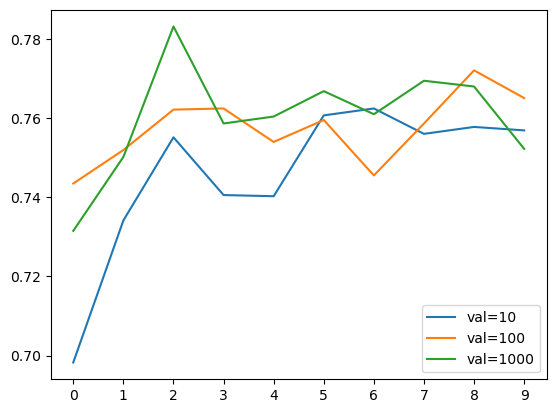

In [46]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

**innser_size=1000 is the best**

## 7. Regularization and dropout
- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [47]:
def make_model(learning_rate=0.001, size_inner=1000, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(11)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [48]:
learning_rate = 0.001
size = 1000

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(f"droprate: {droprate}")

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

droprate: 0.0
Epoch 1/30
309/309 [==============================] - 69s 214ms/step - loss: 0.8815 - accuracy: 0.7079 - val_loss: 0.7760 - val_accuracy: 0.7429
Epoch 2/30
309/309 [==============================] - 65s 211ms/step - loss: 0.5630 - accuracy: 0.8133 - val_loss: 0.7271 - val_accuracy: 0.7598
Epoch 3/30
309/309 [==============================] - 66s 213ms/step - loss: 0.4209 - accuracy: 0.8534 - val_loss: 0.7398 - val_accuracy: 0.7641
Epoch 4/30
309/309 [==============================] - 65s 211ms/step - loss: 0.3040 - accuracy: 0.8972 - val_loss: 0.7715 - val_accuracy: 0.7679
Epoch 5/30
309/309 [==============================] - 65s 211ms/step - loss: 0.2133 - accuracy: 0.9285 - val_loss: 0.8364 - val_accuracy: 0.7615
Epoch 6/30
309/309 [==============================] - 65s 211ms/step - loss: 0.1539 - accuracy: 0.9501 - val_loss: 0.8485 - val_accuracy: 0.7697
Epoch 7/30
309/309 [==============================] - 65s 211ms/step - loss: 0.0920 - accuracy: 0.9725 - val_loss: 0

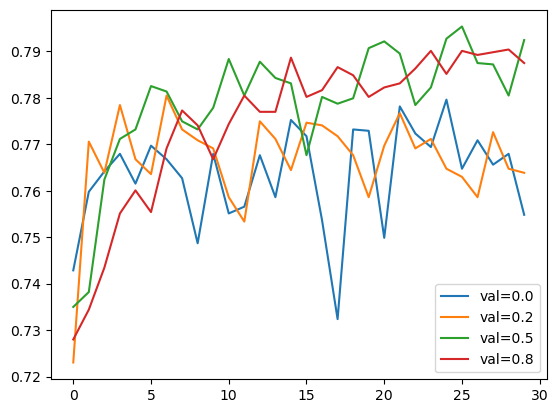

In [49]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.legend()

I'm go with **0.5**

## 8. Data augmentation

In [50]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    "./training",
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    "./validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.


In [51]:
learning_rate = 0.001
size = 1000
droprate = 0.5

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
309/309 [==============================] - 108s 341ms/step - loss: 1.1719 - accuracy: 0.6163 - val_loss: 0.7792 - val_accuracy: 0.7431
Epoch 2/50
309/309 [==============================] - 104s 337ms/step - loss: 0.9404 - accuracy: 0.6857 - val_loss: 0.7574 - val_accuracy: 0.7493
Epoch 3/50
309/309 [==============================] - 104s 336ms/step - loss: 0.8494 - accuracy: 0.7171 - val_loss: 0.7319 - val_accuracy: 0.7580
Epoch 4/50
309/309 [==============================] - 104s 336ms/step - loss: 0.8059 - accuracy: 0.7284 - val_loss: 0.7229 - val_accuracy: 0.7638
Epoch 5/50
309/309 [==============================] - 104s 336ms/step - loss: 0.7604 - accuracy: 0.7391 - val_loss: 0.7178 - val_accuracy: 0.7711
Epoch 6/50
309/309 [==============================] - 104s 336ms/step - loss: 0.7433 - accuracy: 0.7456 - val_loss: 0.7282 - val_accuracy: 0.7636
Epoch 7/50
309/309 [==============================] - 104s 337ms/step - loss: 0.7358 - accuracy: 0.7544 - val_loss: 0.7101 -

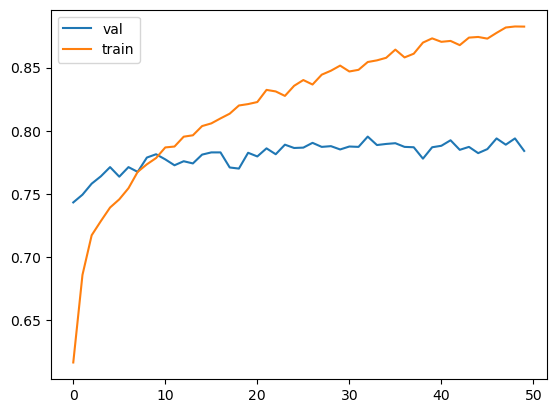

In [52]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

**After the data augmentation process, no significant increase in accuracy values was observed. Therefore, there is no need for us to use the data augmentation process.**

## 9. Training a larger model
- Train a 299x299 model

In [53]:
def make_model(input_size=150, learning_rate=0.001, size_inner=1000, droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(11)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [54]:
input_size = 299

In [55]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#    shear_range=10,
#    zoom_range=0.1,
#    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    "./training",
    target_size=(input_size, input_size),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./validation",
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.


In [56]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [57]:
learning_rate = 0.001
size = 1000
droprate = 0.5

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
309/309 [==============================] - 101s 316ms/step - loss: 0.6421 - accuracy: 0.7920 - val_loss: 0.4429 - val_accuracy: 0.8571
Epoch 2/50
309/309 [==============================] - 97s 312ms/step - loss: 0.4340 - accuracy: 0.8550 - val_loss: 0.4373 - val_accuracy: 0.8566
Epoch 3/50
309/309 [==============================] - 97s 314ms/step - loss: 0.3508 - accuracy: 0.8816 - val_loss: 0.4093 - val_accuracy: 0.8668
Epoch 4/50
309/309 [==============================] - 97s 312ms/step - loss: 0.3120 - accuracy: 0.8962 - val_loss: 0.4258 - val_accuracy: 0.8659
Epoch 5/50
309/309 [==============================] - 97s 312ms/step - loss: 0.2766 - accuracy: 0.9062 - val_loss: 0.4498 - val_accuracy: 0.8583
Epoch 6/50
309/309 [==============================] - 97s 312ms/step - loss: 0.2441 - accuracy: 0.9130 - val_loss: 0.3995 - val_accuracy: 0.8735
Epoch 7/50
309/309 [==============================] - 97s 314ms/step - loss: 0.2142 - accuracy: 0.9280 - val_loss: 0.3961 - val_a

## 10. Using the model
- Loading the model
- Evaluating the model
- Getting predictions

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [59]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "./evaluation",
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 3347 images belonging to 11 classes.


In [64]:
model = keras.models.load_model('xception_v4_48_0.886.h5')

In [65]:
model.evaluate(test_ds)

105/105 [==============================] - 27s 252ms/step - loss: 0.6021 - accuracy: 0.9014


[0.6021475195884705, 0.9014042615890503]

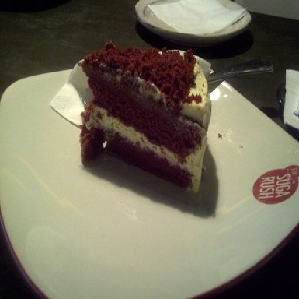

In [66]:
path = "./evaluation/Dessert/14.jpg"
img = load_img(path, target_size=(299, 299))
img

In [67]:
# converting img to numpy array
import numpy as np

x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [68]:
X = preprocess_input(X)

In [69]:
pred = model.predict(X)

1/1 [==============================] - 1s 644ms/step


In [70]:
classes = [
    'Bread',
    'Dairy product',
    'Dessert',
    'Egg',
    'Fried food',
    'Meat',
    'Noodles-Pasta',
    'Rice',
    'Seafood',
    'Soup',
    'Vegetable-Fruit'
]

In [71]:
dict(zip(classes, pred[0]))

{'Bread': 5.8344793,
 'Dairy product': -20.109528,
 'Dessert': 24.526112,
 'Egg': -12.835359,
 'Fried food': -18.82765,
 'Meat': -9.882886,
 'Noodles-Pasta': -20.423159,
 'Rice': -28.857113,
 'Seafood': -20.070269,
 'Soup': -13.416373,
 'Vegetable-Fruit': -29.18244}

In [73]:
prediction_result = dict(zip(classes, pred[0]))

max_class = max(prediction_result, key=prediction_result.get)
max_value = prediction_result[max_class]

print(f"The predicted class with the highest value: {max_class}")
print(f"The value for this class: {max_value}")

The predicted class with the highest value: Dessert
The value for this class: 24.526111602783203


**The prediction results of the model look quite successful.**